In [3]:
import pandas as pd
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('outputs/iphone.csv')
df2 = pd.read_csv('outputs/iphone2.csv')
# df3 = pd.read_csv('outputs/iphone3.csv')
# df4 = pd.read_csv('outputs/iphone4.csv')
# df5 = pd.read_csv('outputs/iphone5.csv')

df = pd.concat([df, df2])
df.head()

,city,is_featured,list_position,post_date,post_time,price,product_id,state,thumb_url,title,url
0,São Paulo,False,0,2021-04-18,09:00,550.0,870870786,SP,https://img.olx.com.br/thumbs256x256/35/357115...,iPhone SE,https://sp.olx.com.br/sao-paulo-e-regiao/celul...
1,Nova Iguaçu,False,1,2021-04-18,08:01,450.0,870865566,RJ,https://img.olx.com.br/thumbs256x256/35/350188...,Iphone SE,https://rj.olx.com.br/rio-de-janeiro-e-regiao/...
2,São Paulo,False,2,2021-04-18,08:00,4400.0,870864330,SP,https://img.olx.com.br/thumbs256x256/35/354116...,iPhone,https://sp.olx.com.br/sao-paulo-e-regiao/celul...
3,Balneário Camboriú,False,3,2021-04-18,08:00,3500.0,870857692,SC,https://img.olx.com.br/thumbs256x256/35/353116...,Iphone SE,https://sc.olx.com.br/norte-de-santa-catarina/...
4,Salvador,False,4,2021-04-18,08:00,650.0,870857422,BA,https://img.olx.com.br/thumbs256x256/35/354158...,iphone SE,https://ba.olx.com.br/grande-salvador/celulare...


In [ ]:
df.describe()

,list_position,price,product_id
count,25000.000000,24770.000000,2.500000e+04
mean,24.500000,1545.663585,8.742010e+08
std,14.431158,1179.787932,5.985734e+06
min,0.000000,0.000000,6.067059e+08
25%,12.000000,690.000000,8.704900e+08
50%,24.500000,1200.000000,8.753345e+08
75%,37.000000,2200.000000,8.764145e+08
max,49.000000,18000.000000,8.821401e+08


## 0. Cleaning Data


### A. Make title categorical
#### - decided to get a list of all models and compare, rather than dealing with a unique list of titles directly from data because of the weird titles users put on OLX, it would be difficult to clean that this way.

In [ ]:
models = ['iPhone',
'iPhone 3G',
'iPhone 3GS',
'iPhone 4',
'iPhone 4S',
'iPhone 5',
'iPhone 5c',
'iPhone 5s',
'iPhone 6',
'iPhone 6 Plus',
'iPhone 6s',
'iPhone 6s Plus',
'iPhone 7',
'iPhone 7 Plus',
'iPhone 8',
'iPhone 8 Plus',
'iPhone X',
'iPhone XR',
'iPhone XS',
'iPhone XS Max',
'iPhone 11',
'iPhone 11 Pro',
'iPhone 11 Pro Max',
'iPhone SE',
'iPhone 12 mini',
'iPhone 12',
'iPhone 12 Pro',
'iPhone 12 Pro Max']

models_formatted = list(map(lambda x: set(list(map(lambda y: y.lower(), x.split(' ')))), models))
print(models_formatted)


[{'iphone'}, {'3g', 'iphone'}, {'3gs', 'iphone'}, {'4', 'iphone'}, {'4s', 'iphone'}, {'5', 'iphone'}, {'5c', 'iphone'}, {'5s', 'iphone'}, {'iphone', '6'}, {'plus', 'iphone', '6'}, {'6s', 'iphone'}, {'plus', '6s', 'iphone'}, {'7', 'iphone'}, {'7', 'plus', 'iphone'}, {'8', 'iphone'}, {'plus', '8', 'iphone'}, {'x', 'iphone'}, {'iphone', 'xr'}, {'xs', 'iphone'}, {'xs', 'iphone', 'max'}, {'11', 'iphone'}, {'pro', '11', 'iphone'}, {'pro', '11', 'iphone', 'max'}, {'se', 'iphone'}, {'12', 'mini', 'iphone'}, {'12', 'iphone'}, {'pro', '12', 'iphone'}, {'pro', '12', 'iphone', 'max'}]


In [ ]:
model_column = pd.DataFrame(['OK' for index, row in df.iterrows()])
pd.concat([df, model_column], axis=0)
df.head()
for index, row in df.iterrows():
    if ' ' in row['title']:
        title = list(map(lambda x: x.lower(), row['title'].split(' ')))
    else:
        title =  [row['title'].lower()]

    if '' in title:
        title.remove('')
    
    for model in models_formatted:
        if model <= set(title):
            row['model'] = ''.join(title)
        else:
            row['model'] = None

In [ ]:
df.

## 1. Analysing general info about the dataframe


In [ ]:
df.describe()

,list_position,price,product_id
count,25000.000000,24770.000000,2.500000e+04
mean,24.500000,1545.663585,8.742010e+08
std,14.431158,1179.787932,5.985734e+06
min,0.000000,0.000000,6.067059e+08
25%,12.000000,690.000000,8.704900e+08
50%,24.500000,1200.000000,8.753345e+08
75%,37.000000,2200.000000,8.764145e+08
max,49.000000,18000.000000,8.821401e+08


In [ ]:
df.head()

,city,is_featured,list_position,post_date,post_time,price,product_id,state,thumb_url,title,url
0,São Paulo,False,0,2021-04-18,09:00,550.0,870870786,SP,https://img.olx.com.br/thumbs256x256/35/357115...,iPhone SE,https://sp.olx.com.br/sao-paulo-e-regiao/celul...
1,Nova Iguaçu,False,1,2021-04-18,08:01,450.0,870865566,RJ,https://img.olx.com.br/thumbs256x256/35/350188...,Iphone SE,https://rj.olx.com.br/rio-de-janeiro-e-regiao/...
2,São Paulo,False,2,2021-04-18,08:00,4400.0,870864330,SP,https://img.olx.com.br/thumbs256x256/35/354116...,iPhone,https://sp.olx.com.br/sao-paulo-e-regiao/celul...
3,Balneário Camboriú,False,3,2021-04-18,08:00,3500.0,870857692,SC,https://img.olx.com.br/thumbs256x256/35/353116...,Iphone SE,https://sc.olx.com.br/norte-de-santa-catarina/...
4,Salvador,False,4,2021-04-18,08:00,650.0,870857422,BA,https://img.olx.com.br/thumbs256x256/35/354158...,iphone SE,https://ba.olx.com.br/grande-salvador/celulare...


In [ ]:
profile = ProfileReport(df, title='OLX Brasil - Offers report - iPhones', html={'style': {'full_width': True}})
profile

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


# Questions: 
## 2. is there a relation between is_featured and price?


## 1. is there a relation between post_time and price?


In [ ]:
df_times = df[['post_time', 'product_id']]
df_times.loc[:,'post_time'] = df_times['post_time'].apply(lambda x: x.split(':')[0])

df_times = df_times[['post_time', 'product_id']].groupby(['post_time']).agg('count')
df_times.reset_index(level=0, inplace=True)
df_times.sort_values('post_time').head()

/Users/brenor2/Documents/Br2 Digital/OwnApps/olxcrawler2/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,post_time,product_id
0,00,32
1,01,34
2,02,43
3,03,26
4,04,38


In [ ]:
df.to_csv('output.csv')

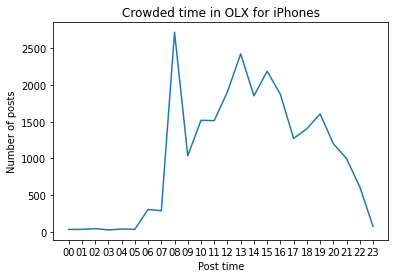

<Figure size 21600x64800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# x axis values
x = df_times['post_time']
# corresponding y axis values
y = df_times['product_id']
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Post time')
# naming the y axis
plt.ylabel('Number of posts')
  
# giving a title to my graph
plt.title('Crowded time in OLX for iPhones')
  
# function to show the plot
plt.figure(figsize=(300,900))
plt.show()

In [ ]:
df_times_price = df[['post_time', 'price']]
df_times_price.loc[:,'post_time'] = df_times['post_time'].apply(lambda x: x.split(':')[0])

df_times_price = df_times_price[['post_time', 'price']].groupby(['post_time']).agg('mean')
df_times_price.reset_index(level=0, inplace=True)
df_times_price.sort_values('post_time').head()

/Users/brenor2/Documents/Br2 Digital/OwnApps/olxcrawler2/env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,post_time,price
0,00,1130.0
1,01,2020.0
2,02,2229.8
3,03,1444.0
4,04,970.6


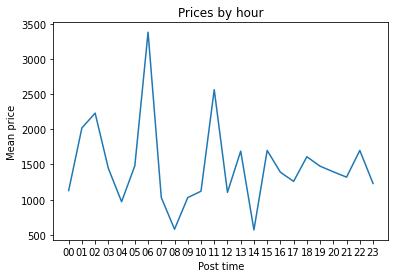

<Figure size 21600x64800 with 0 Axes>

In [ ]:
# x axis values
x = df_times_price['post_time']
# corresponding y axis values
y = df_times_price['price']
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Post time')
# naming the y axis
plt.ylabel('Mean price')
  
# giving a title to my graph
plt.title('Prices by hour')
  
# function to show the plot
plt.figure(figsize=(300,900))
plt.show()

## 3. is there a relation between state and price?

In [ ]:
df_stateprice_mean = df[['state', 'price']].groupby(['state']).mean()
df_stateprice_mean.sort_values('price')

,price
state,
SE,1353.762938
RS,1388.508539
MA,1403.131387
SP,1432.616779
MS,1443.552036
SC,1451.322981
BA,1475.413043
ES,1514.680758
RJ,1539.987337


## CORRELATION OF FEATURES AND CLASSES


In [ ]:
plt.scatter(df['price'], df['title'], color='b')
plt.xlabel('Price')
plt.ylabel('Model')
# plt.axis([min(df['price'])])
plt.show()

ValueError: 
Iphone 200$$
          ^
Expected end of text, found '$'  (at char 10), (line:1, col:11)

### Suggest best price per iPhone model


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [ ]:
x = df[['city', 'state', 'title', 'price']]
y = df['price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

In [ ]:
sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

# cv_score = cross_val_score(lsvr, x, y, cv=5)
# print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(xtest)

ValueError: could not convert string to float: 'Belém'

In [ ]:
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

NameError: name 'ypred' is not defined